# Example 04: Pressure-temperature phase diagram of Cu

In this example, the pressure-temperature phase diagram of Cu will be calculated.

The EAM potential we will use is : [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

The input file is provided in the folder. The calculation is very similar to the calculation of melting temperature. However, we calculate the melting temperature for various pressures to arrive at the phase-diagram.

There are five input files in the folder, from `input1.yaml` to `input5.yaml`. Each file contains the calculations for a single pressure. You can also add all of the calculations in a single file under the `calculations` block. It is split here into five files for the easiness of running the calculations on relatively small machines.

The calculation can be run by:

```
calphy -i input1.yaml
```

and so on until `input5.yaml`. After the calculations are over, we can read in the results and compare it.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

The starting temperatures and pressures for our calculations:

In [4]:
temp = [1600, 2700, 3700, 4600]
press = [100000, 500000, 1000000, 1500000]

Now a small loop which goes over each folder and calculates the melting temperature value:

In [5]:
tms = []

for t, p in zip(temp, press):
    sfile =  "ts-FCC-%d-%d/temperature_sweep.dat"%(t, p)
    lfile =  "ts-LQD-%d-%d/temperature_sweep.dat"%(t, p)
    t, f, fe = np.loadtxt(sfile, unpack=True)
    t, l, fe = np.loadtxt(lfile, unpack=True)
    args = np.argsort(np.abs(f-l))
    
    tms.append(t[args[0]])

To compare our results, we will use a Simon equation, given by,

$$
T_m(P) = T_{m0}(P/a + 1)^b
$$

We will use reported values for parameters $T_{m0}$, $a$ and $b$ from two different publications:

- [Wang, Shuaichuang, Gongmu Zhang, Haifeng Liu, and Haifeng Song. “Modified Z Method to Calculate Melting Curve by Molecular Dynamics.” The Journal of Chemical Physics 138, no. 13 (April 7, 2013): 134101.](https://doi.org/10.1063/1.4798225)

In [6]:
def get_tm(press):
    tm = 1315*(press/15.84 + 1)**0.543
    return tm

- [An, Qi, Sheng-Nian Luo, Li-Bo Han, Lianqing Zheng, and Oliver Tschauner. “Melting of Cu under Hydrostatic and Shock Wave Loading to High Pressures.” Journal of Physics: Condensed Matter 20, no. 9 (March 5, 2008): 095220.](https://doi.org/10.1088/0953-8984/20/9/095220)

In [8]:
def get_tm2(press):
    tm = 1325*(press/15.37 + 1)**0.53
    return tm

An array for pressures over which the two equations will be fit, and values of the two expressions are calculated.

In [9]:
pfit = np.arange(0, 151, 1)
tma = get_tm(pfit)
tmb = get_tm2(pfit)

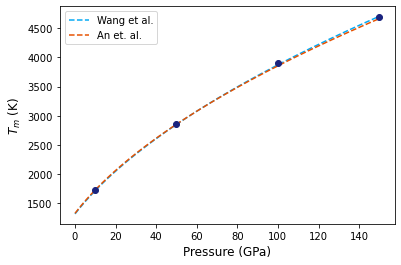

In [11]:
plt.plot(pfit, tma, ls="dashed", label="Wang et al.", color="#03A9F4")
plt.plot(pfit, tmb, ls="dashed", label="An et. al.", color="#E65100")
plt.plot(np.array(press)/10000, tms, 'o', color="#1A237E")
plt.xlabel("Pressure (GPa)", fontsize=12)
plt.ylabel(r"$T_m$ (K)", fontsize=12)
plt.legend()
plt.savefig("tp-diagram.png", dpi=300, bbox_inches="tight")